# ДЗ 1, часть 2. Теория информации

Имя, Фамилия: Тань Сипэн

группа: 223

**Оценка(для проверяющего):** 0 из 10

**Дедлайн:** одновременно с частью 3

In [35]:
#all imports here please
import pickle as pkl

from collections import OrderedDict
import heapq

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#... add your own if necessary

Энтропию можно использовать не только для описания хаотичности, беспорядочности и уровня неопределённости, но и для того, чтобы исследовать зависимость между случайными величинами, используя теорию информации. Начнём с базовых вещей и постепенно дойдём до ультрапопулярной эвристики выбора важных признаков для машинного обучения -- взаимной информации.

## Задача 1. Поисследуем энтропию (2 балла)

Будем предполагать, что нам даны две случайных величины $X,Y$, можете предполагать, что они дискретные или имеют плотности, выкладок этот факт не изменит, но делайте всё по одному стандарту: укажите ниже и придерживайтесь его на всём протяжении ДЗ, если явно не просят сделать иначе.

**Choose your weapon/Выберите ваше оружие/Сhoisissez votre arme/Изаберите себи оружje:**  

$$
\sum_i
$$  

### Независимость?

Покажите, что если две случайных величины $X,Y$ независимы, то $H(X,Y)=H(X)+H(Y)$.

Имейте в виду, что слева под знаком энтропии ДВЕ случайных величины, рассматриваемых как 2d-вектор, поэтому матожидание берётся по их совместному закону распределения. Это называется *совместной энтропией* величин $X,Y$.

$$H(X, Y) = -\sum_{x} \sum_{y} P(X = x, Y = y) \log P(X = x, Y = y)$$
$$= -\sum_{x} \sum_{y} P(X = x) P(Y = y) \log [P(X = x) P(Y = y)]$$
$$= -\sum_{x} \sum_{y} P(X = x) P(Y = y) \log P(X = x) - \sum_{x} \sum_{y} P(X = x) P(Y = y) \log P(Y = y)$$
$$= -\sum_{x} P(X = x) \log P(X = x) \sum_{y} P(Y = y) - \sum_{y} P(Y = y) \log P(Y = y) \sum_{x} P(X = x)$$
$$= -\sum_{x} P(X = x) \log P(X = x) - \sum_{y} P(Y = y) \log P(Y = y)$$
$$= H(X) + H(Y)$$

### Зависимость?

Покажите, что в общем случае

$$
H(X,Y) = H(X) + H(Y \vert X)
$$
и вычислите, чему будет равен остаток $H(Y \vert X)$. Он носит название *условной энтропии*, не путайте с энтропией условного распределения.

$$H(X, Y) = -\sum_{x} \sum_{y} P(X = x, Y = y) \log P(X = x, Y = y)$$

$$= -\sum_{x} \sum_{y} P(X = x) P(Y = y \vert X = x) \log \left( P(X = x) P(Y = y \vert X = x) \right)$$

$$= -\sum_{x} \sum_{y} P(X = x) P(Y = y \vert X = x) \log P(X = x) - \sum_{x} \sum_{y} P(X = x) P(Y = y \vert X = x) \log P(Y = y \vert X = x)$$

$$= -\sum_{x} P(X = x) \log P(X = x) \sum_{y} P(Y = y \vert X = x) - \sum_{x} \sum_{y} P(X = x) P(Y = y \vert X = x) \log P(Y = y \vert X = x)$$

$$= -\sum_{x} P(X = x) \log P(X = x) - \sum_{x} \sum_{y} P(X = x) P(Y = y \vert X = x) \log P(Y = y \vert X = x)$$

$$= H(X) + H(Y \vert X)$$

$H(Y \vert X) = - \sum_{x} \sum_{y} P(X = x) P(Y = y \vert X = x) \log P(Y = y \vert X = x)$

!! Обоснуйте, какой может быть физический смысл $H(Y\vert X)$ (что она измеряет?) с точки зрения теории кодирования в случае дискретных СВ $X,Y$.

Условная энтропияопределяется как ожидаемое значение энтропии Y при различных значениях X.

## Задача 2. Взаимная информация (2 балла)

Можно рассмотреть разницу

$$
I(X,Y) = H(X) - H(X \vert Y),
$$

которая отражает в некотором смысле (вы наверняка об этом думали в окошке выше) уровень использования информации о значении $Y$ при кодировании $X$ (если мы о кодировании). Эта величина носит название *взаимной информации* и является ещё одним хорошим способом исследования зависимости между случайными величинами. Библиотека `sklearn` позволяет оценивать её по данным и тем самым выделять самые важные признаки для моделей машинного обучения.

### Симметричность

Докажите, что $I(X,Y)=I(Y,X)$.

$$
I(X,Y) = H(X) - H(X \vert Y)
= H(X) + H(Y) - H(Y, X)
$$

$$
I(Y,X) = H(Y) - H(Y \vert X)
= H(Y) + H(X) - H(Y, X)
$$

### Связь с KL

Докажите, что $I(X,Y)= D_{KL}( p_{X,Y} \vert p_{X}p_{Y})$. Слева совместное распределение $X,Y$, справа -- произведение вероятностей(или плотностей) $X,Y$. 

$
I(X,Y) \Longrightarrow
$

$$
= H(X) - H(X \vert Y) = H(Y) + H(X) - H(Y, X)
$$

$$
= -\sum_{x} P(X = x) \log P(X = x) -\sum_{y} P(Y = y) \log P(Y = y) + \sum_{x} \sum_{y} P(X = x, Y = y) \log P(X = x, Y = y)
$$

$$
= \sum_{x,y} p_{X,Y}(x, y) \log p_{X,Y}(x, y) - \sum_{x} p_X(x) \log p_X(x) - \sum_{y} p_Y(y) \log p_Y(y)
$$




$
D_{KL}(p_{X,Y} \vert p_X p_Y) \Longrightarrow
$

$$
= \sum_{x,y} p_{X,Y}(x, y) \log p_{X,Y}(x, y) - \sum_{x,y} p_{X,Y}(x, y) \log (p_X(x) p_Y(y))
$$

$$
= \sum_{x,y} p_{X,Y}(x, y) \log p_{X,Y}(x, y) - \sum_{x,y} p_{X,Y}(x, y) [\log p_X(x) + \log p_Y(y)]
$$

$$
= \sum_{x,y} p_{X,Y}(x, y) \log p_{X,Y}(x, y) - \sum_{x} p_X(x) \log p_X(x) - \sum_{y} p_Y(y) \log p_Y(y)
$$

### Какой смысл?..

Как вы думаете, как интерпретируется $I(X,Y)$ в терминах теории кодирования (при дискретных $X,Y$)? Что измеряет эта величина?

Взаимная информация $I(X,Y)$ является фундаментальным понятием в теории кодирования, связывающим характеристики канала связи с его способностью передавать информацию. Она позволяет количественно оценить, насколько выходной сигнал информативен относительно входного, и служит основой для разработки эффективных кодовых схем, максимально использующих потенциал канала.

## Максимальная энтропия (3 балла)

### Экспоненциальное распределение

(1 балл) Вычислите энтропию для экспоненциального распределения $Exp(\lambda)$ и распределения Лапласа $Laplace(0,\lambda)$, имеющее плотность $\frac{\lambda}{2} e^{-\lambda \vert x\vert }$.

$$
H(X) = -\int_{-\infty}^{+\infty} f_X(x) \ln f_X(x) \, dx , Exp(\lambda)
$$

$$
H(X) = -\int_{0}^{+\infty} \lambda e^{-\lambda x} \ln (\lambda e^{-\lambda x}) \, dx
= -\int_{0}^{+\infty} \lambda e^{-\lambda x} (\ln \lambda - \lambda x) \, dx
= -\ln \lambda \int_{0}^{+\infty} \lambda e^{-\lambda x} \, dx + \lambda \int_{0}^{+\infty} \lambda x e^{-\lambda x} \, dx
= -\ln \lambda \cdot 1 + \lambda \cdot \frac{1}{\lambda} 
$$
$$
= -\ln \lambda + 1
$$

Энтропия экспоненциального распределения равна: $H(X) = 1 - \ln \lambda$

$$
H(X) = -\int_{-\infty}^{+\infty} f_X(x) \ln f_X(x) \, dx, Laplace(0,\lambda)
$$

$$
H(X) = -\int_{-\infty}^{+\infty} \frac{\lambda}{2} e^{-\lambda |x|} \ln \left( \frac{\lambda}{2} e^{-\lambda |x|} \right) \, dx
= -\int_{-\infty}^{+\infty} \frac{\lambda}{2} e^{-\lambda |x|} \left( \ln \left( \frac{\lambda}{2} \right) - \lambda |x| \right) \, dx
= -\ln \left( \frac{\lambda}{2} \right) \int_{-\infty}^{+\infty} \frac{\lambda}{2} e^{-\lambda |x|} \, dx + \lambda \int_{-\infty}^{+\infty} \frac{\lambda}{2} |x| e^{-\lambda |x|} \, dx
$$

$$
= -\ln \left( \frac{\lambda}{2} \right) \cdot 1 + \lambda \cdot \frac{1}{\lambda} = -\ln \left( \frac{\lambda}{2} \right) + 1
= 1 - \ln \left( \frac{\lambda}{2} \right) = 1 + \ln \left( \frac{2}{\lambda} \right)
$$

Энтропия распределения Лапласа равна: $H(X) = 1 + \ln \left( \frac{2}{\lambda} \right)$


(2 балла) Докажите, что Экспоненциальное распределение $Exp(\lambda)$ имеет максимальную энтропию среди всех абсолютно непрерывных вероятностных распределений с фиксированным средним и имеющих ненулевую плотность в области $x\geq 0$.

$p(x)$ $-$ плотность некоторого распределения

$p'(x)$ $-$ плотность экспоненциального распределения

$$H(p) = CE(p' \mid p) \geq H(p')$$

$$CE(p' \mid p) = -\int_{-\infty}^{+\infty} p'(x) \log{p(x)} dx = -\int_{-\infty}^{+\infty} p'(x) \log{\lambda e^{-\lambda x}} dx = -\int_{-\infty}^{+\infty} p'(x) \log{\lambda} dx + \int_{-\infty}^{+\infty} p'(x) \lambda x dx = -\log{\lambda} + \lambda \int_{-\infty}^{+\infty} p'(x) x dx $$
$$= -\log{\lambda} + \lambda \cdot \frac{1}{\lambda} = 1 - \log{\lambda}$$

## Строим свой код, основанный на частотах (3 балла)

Представим себе для примера достаточно большую книгу (например, Войну и Мир Льва Николаевича Толстого). Для того, чтобы записывать буквы в кодировке UTF-8 требуется от 2 до 4 байт (каждый 8бит). Но книга -- это не просто какой-то iid равновероятный поток символов, а структурированный текст, структуру которого можно по-разному использовать. К примеру, мы можем задуматься над тем, чтобы сжать её, используя информацию о том, какие символы встречаются чаще: ведь более частые можно кодировать более короткими кодовыми словами, а более редкие -- более длинными.

В этом идея [кода Хаффмана](https://compression.ru/download/articles/huff/huffman_1952_minimum-redundancy-codes.pdf), который мы попробуем поисследовать в самой простой наивной имплементации.

### Вычисляем языковую статистику

Возьмём для примера текст вики-страницы [МО1](http://wiki.cs.hse.ru/%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_1)

In [36]:
with open("moText.txt", "r", encoding="utf-8") as f:
    MOText = "\n".join(f.readlines())

print(MOText[:180])

== О курсе ==



[[Файл:ML_surfaces.png|280px|borderless|left]]



Курс читается для студентов 3-го курса [https://cs.hse.ru/ami ПМИ ФКН ВШЭ] в 1-2 модулях.



Проводится с 2016 го


Это не сильно большой, но не очень маленький текст.

In [37]:
print(len(MOText))

10001


Вычислите частоту каждого символа, сохранив их в упорядоченный словарь (OrderedDict, пригодится для сортировок)  вида {<символ>: <частота>}.

In [38]:
from collections import OrderedDict

def compute_char_frequency(text):
    frequency = {}
    for char in text:
        frequency[char] = frequency.get(char, 0) + 1
    ordered_frequency = OrderedDict(sorted(frequency.items(), key=lambda item: item[1], reverse=True))
    return ordered_frequency

text = MOText
symFreqs = compute_char_frequency(text)

In [39]:
for key,val in symFreqs.items():
    print(f"{key}: {val}")
print(f"In total {len(symFreqs)} unique symbols, max freq= {max([val for val in symFreqs.values()])}")

 : 912

: 525
е: 389
а: 378
о: 369
н: 350
и: 343
t: 305
/: 281
e: 217
s: 197
р: 185
|: 185
с: 180
т: 175
.: 163
л: 159
в: 155
h: 147
a: 145
д: 143
2: 140
o: 140
к: 134
i: 134
r: 125
m: 125
p: 114
м: 106
n: 105
у: 99
:: 96
=: 89
ч: 89
l: 87
п: 85
[: 81
]: 81
0: 77
-: 71
я: 70
ы: 70
c: 67
1: 64
й: 63
u: 59
з: 59
б: 58
П: 57
г: 54
М: 53
_: 52
k: 48
d: 46
g: 44
w: 43
ь: 43
К: 41
И: 38
А: 38
y: 35
ш: 35
,: 33
С: 32
Д: 32
b: 30
v: 30
ц: 29
Б: 29
M: 27
В: 26
f: 24
': 24
*: 21
P: 20
ж: 19
х: 18
+: 18
Р: 17
T: 17
3: 16
5: 16
C: 16
9: 16
ю: 16
Н: 15
6: 15
N: 15
4: 14
О: 13
L: 13
x: 13
S: 13
7: 13
(: 13
): 13
Э: 12
A: 12
R: 12
ф: 12
H: 11
!: 11
З: 11
F: 10
Z: 10
8: 9
G: 9
D: 9
W: 9
Т: 9
E: 8
V: 8
щ: 8
U: 7
q: 7
э: 7
z: 7
J: 7
I: 7
Ф: 6
Ш: 6
Е: 6
K: 6
X: 5
?: 5
B: 5
ё: 5
Y: 5
У: 5
Л: 4
": 4
—: 4
O: 3
@: 3
Я: 3
%: 3
Q: 2
<: 2
{: 2
Г: 2
}: 2
&: 1
>: 1
ъ: 1
Ч: 1
j: 1
Ю: 1
Ж: 1
In total 148 unique symbols, max freq= 912


### Строим Кодер и Декодер Хаффмана

Это хорошее упражнение для ценителей алгоритмов, но давайте сократим себе время и попробуем адаптировать одну из [доступных реализаций](https://www.geeksforgeeks.org/huffman-coding-in-python/) под наш сценарий, обернув в привычную классовую структуру и сохранив максимальную представленность самого алгоритма.

In [40]:
#taken from https://www.geeksforgeeks.org/huffman-coding-in-python/
class Node:
    def __init__(self, symbol=None, frequency=None):
        #print("CREATING", symbol, frequency)
        self.symbol = symbol
        self.frequency = frequency
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.frequency < other.frequency

def build_huffman_tree(chars, freq):
  
    # Create a priority queue of nodes
    priority_queue = [Node(char, f) for char, f in zip(chars, freq)]
    heapq.heapify(priority_queue)

    # Build the Huffman tree
    while len(priority_queue) > 1:
        left_child = heapq.heappop(priority_queue)
        right_child = heapq.heappop(priority_queue)
        merged_node = Node(frequency=left_child.frequency + right_child.frequency)
        merged_node.left = left_child
        merged_node.right = right_child
        heapq.heappush(priority_queue, merged_node)

    return priority_queue[0]

def generate_huffman_codes(node, code="", huffman_codes={}):
    if node is not None:
        if node.symbol is not None:
            huffman_codes[node.symbol] = code
        else:
            generate_huffman_codes(node.left, code + "0", huffman_codes)
            generate_huffman_codes(node.right, code + "1", huffman_codes)

    return huffman_codes

def runTest():
    # Given example (try it to test)
    chars = ['a', 'b', 'c', 'd', 'e', 'f']
    freq = [4, 7, 15, 17, 22, 42]

    # Build the Huffman tree
    root = build_huffman_tree(chars, freq)

    # Generate Huffman codes
    huffman_codes = generate_huffman_codes(root)

    # Print Huffman codes
    for char, code in huffman_codes.items():
        print(f"Character: {char}, Code: {code}")
        
runTest()

Character: f, Code: 0
Character: a, Code: 1000
Character: b, Code: 1001
Character: c, Code: 101
Character: d, Code: 110
Character: e, Code: 111


Надеемся, что этот код заработал.... Теперь напишем кодер, используя эту технологию.

In [41]:
class HuffmanCoderDecoder:
    
    def __init__(self,symbolProbaTable):
        """_summary_

        Args:
            symbolProbaTable (dict): a dict with symbol(keys) and probabilities (val)
        """ 
        self.symbols = list(symbolProbaTable.keys())
        self.probas = list(symbolProbaTable.values())
        self.symbolProbaTable = symbolProbaTable
        self.root = None
        self.fit()
        
    def fit(self):
        """
        Sets up encoder and decoder tables
        """        
        self.root = build_huffman_tree(self.symbols, self.probas)
        self.encoderTable = generate_huffman_codes(self.root)
        self.decoderTable = {code: char for char, code in self.encoderTable.items()}
        
    def encode(self, text):
        """Encodes the text and returns encoded text

        Args:
            text (str): text to encode
        Returns:
            encodedText (str): encoded text
        """
        encoded_text = ''.join(self.encoderTable[char] for char in text if char in self.encoderTable)
        return encoded_text
    
    def decode(self, text):
        """Decodes the encoded text and returns decoded text

        Args:
            text (str): text to decode
        Returns:
            decodedText (str): decoded text
        """ 
        decoded_text = []
        current_code = ""
        for bit in text:
            current_code += bit
            if current_code in self.decoderTable:
                decoded_text.append(self.decoderTable[current_code])
                current_code = ""
        return ''.join(decoded_text)     

In [42]:
textSample = MOText[:200]

huff = HuffmanCoderDecoder(symFreqs)
encText = huff.encode(textSample)
decText = huff.decode(encText)

In [43]:
print(encText)

1011100101110000011111010000000011111101111110011101111111000001011100101110001000100010001001001001100100111101100000110100011000100011110111011110001111101101111111000011101000100010010111101100110111010011101111101111010100101111111011101111011101011001001011101110010110111111111111011101101101100100010011101011000101111011000111101001011101101011110111101011101011001010110101111011101100111000010011001001100010001000100010010011010110111111001110111100010110111010010110011010111001011001011110110101000011011100011011010100010111110110011011110110111110010101101100110001000100000011001110111000111110011100000000111111011111100111011111101000010010010111101000010000111111011101011011100110001100001110111101010010101111011101011110110010100101100100010110001110100101001010000011111011111110000111110100011101100000100110100010010110001111000101101101011111011010101001100000100010000001101001110000101110001111001110000110111101111100011011010101110011110010101000100010001001111101111001

In [44]:
print(decText)

== О курсе ==



[[Файл:ML_surfaces.png|280px|borderless|left]]



Курс читается для студентов 3-го курса [https://cs.hse.ru/ami ПМИ ФКН ВШЭ] в 1-2 модулях.



Проводится с 2016 года.



'''Лектор:'''


In [45]:
print(textSample)

== О курсе ==



[[Файл:ML_surfaces.png|280px|borderless|left]]



Курс читается для студентов 3-го курса [https://cs.hse.ru/ami ПМИ ФКН ВШЭ] в 1-2 модулях.



Проводится с 2016 года.



'''Лектор:'''


Вычислите, какое получилось сжатие

In [46]:
print("Compression(%): ",len(textSample.encode('utf-8'))*8/len(encText)*100)

Compression(%):  180.43654001616815


Поздравляем, вы сделали простой алгоритм сжатия) .... если у вас больше 100%

### Исследуем, как хорошо себя ведёт код при смене текста

Сравните написанный кодер на двух понравившихся вам текстах на разные темы (возьмите по масштабу что-то похожее на страницу МО).

1. Для чистоты эксперимента очистите оба текста от символов, которых нет в другом тексте
2. Посчитайте таблицу частот для каждого из текстов
3. Обучите кодер на тексте 1
4. Обучите кодер на тексте 2
5. Сопоставьте длину (в битах): 
   1. Текст1, закодированный кодером 1
   2. Текст2, закодированный кодером 1
   3. Текст1, закодированный кодером 2
   4. Текст2, закодированный кодером 2
6. Посчитайте KL-дивергенцию и кроссэнтропию в обе стороны между частотами кодера1 и кодера2

Прокомментируйте результат.

Не забудьте приложить к решению ваших два текстовых файла.

In [47]:
with open("text_1.txt","r", encoding="utf-8") as f:
    text1 = "\n".join(f.readlines())
with open("text_2.txt","r", encoding="utf-8") as f:
    text2 = "\n".join(f.readlines())

In [48]:
print(len(text1))
print(len(text2))

7929
8082


In [49]:
def kl_divergence(p, q, epsilon=1e-10):
    divergence = 0.0
    for key in p:
        if p[key] == 0:
            continue
        p_val = p[key]
        q_val = q.get(key, epsilon)
        divergence += p_val * math.log(p_val / q_val, 2)
    return divergence

def cross_entropy(p, q):
    ce = 0.0
    for key in p:
        if p[key] == 0:
            continue
        if key in q and q[key] > 0:
            ce += p[key] * math.log(1 / q[key], 2)
        else:
            ce += 0
    return ce

def entropy(p):
    h = 0.0
    for key in p:
        if p[key] > 0:
            h -= p[key] * math.log(p[key], 2)
    return h

def compute_char_frequency(text):
    frequency = {}
    for char in text:
        frequency[char] = (frequency.get(char, 0) + 1) #/ len(text)
    ordered_frequency = OrderedDict(sorted(frequency.items(), key=lambda item: item[1], reverse=True))
    for key, value in ordered_frequency.items():
        ordered_frequency[key] = value / len(text)
    return ordered_frequency

In [50]:
common_chars = set(text1).intersection(set(text2))
text1_clean = ''.join([char for char in text1 if char in common_chars])
text2_clean = ''.join([char for char in text2 if char in common_chars])

In [51]:
freq1 = compute_char_frequency(text1_clean)
freq2 = compute_char_frequency(text2_clean)

huff1 = HuffmanCoderDecoder(freq1)
huff2 = HuffmanCoderDecoder(freq2)

In [52]:
import math

enc_text1_huff1 = huff1.encode(text1_clean)
enc_text2_huff1 = huff1.encode(text2_clean)
enc_text1_huff2 = huff2.encode(text1_clean)
enc_text2_huff2 = huff2.encode(text2_clean)

len_text1_huff1 = len(enc_text1_huff1)
len_text2_huff1 = len(enc_text2_huff1)
len_text1_huff2 = len(enc_text1_huff2)
len_text2_huff2 = len(enc_text2_huff2)

kl_1_2 = kl_divergence(freq1, freq2)
kl_2_1 = kl_divergence(freq2, freq1)
ce_1_2 = cross_entropy(freq1, freq2)
ce_2_1 = cross_entropy(freq2, freq1)
entropy1 = entropy(freq1)
entropy2 = entropy(freq2)

In [53]:
print( f"KL(text1 | text2) = {kl_1_2}" )
print( f"KL(text2 | text1) = {kl_2_1}" )
print( f"CE(text1 | text2) = {ce_1_2}" )
print( f"CE(text2 | text1) = {ce_2_1}" )
print( f"H(text1) = {entropy1}" )
print( f"H(text2) = {entropy2}" )

KL(text1 | text2) = 0.022994169539037684
KL(text2 | text1) = 0.020890861948454926
CE(text1 | text2) = 4.329123198765133
CE(text2 | text1) = 4.278781460473011
H(text1) = 4.3061290292260965
H(text2) = 4.257890598524558


In [54]:
print(f"Coding with text1: text1Len={len_text1_huff1}, text2Len={len_text2_huff1}") 
print(f"Coding with text2: text1Len={len_text1_huff2}, text2Len={len_text2_huff2}") 

Coding with text1: text1Len=34349, text2Len=34502
Coding with text2: text1Len=34349, text2Len=34502


In [55]:
#ADD A CHART like https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
#and draw distributions of text1 and text2
#f, ax = plt.subplots
#....
# Подготовка данных для построения графика
dict_1 = compute_char_frequency(text1_clean)
dict_2 = compute_char_frequency(text2_clean)
dict_merge = {}
for key, value in dict_2.items():
    dict_merge[key] = []
    dict_merge[key].append(dict_1[key])
    dict_merge[key].append(dict_2[key])

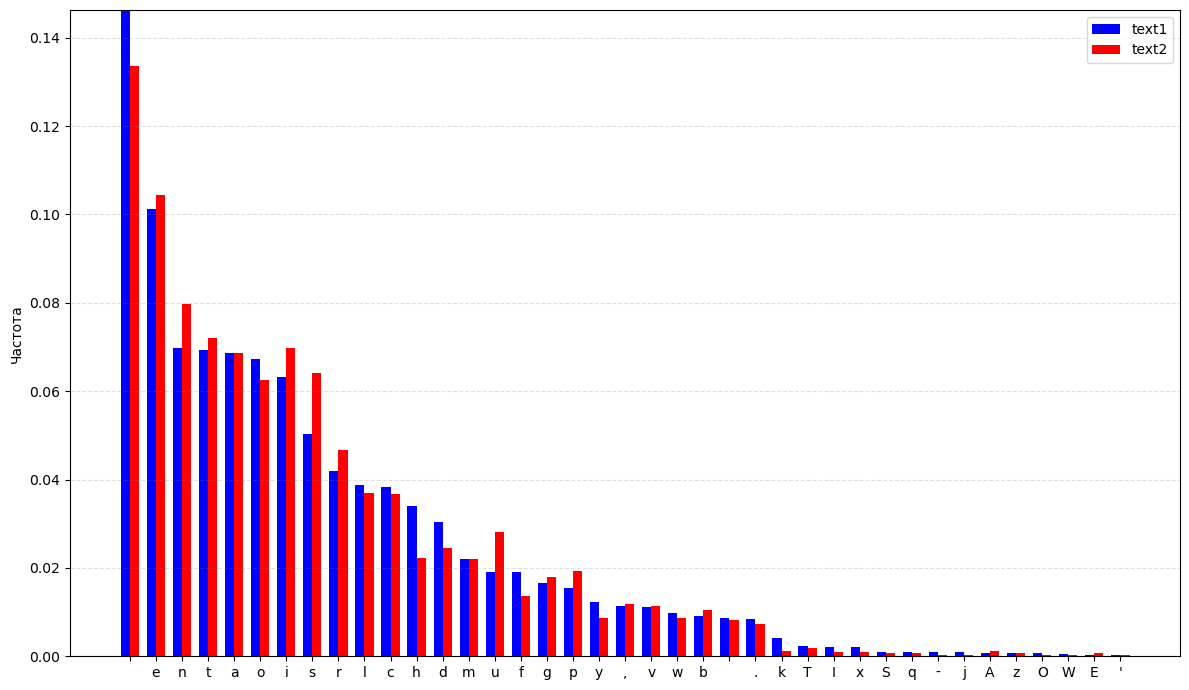

In [56]:
characters = sorted(dict_merge.keys(), key=lambda x: dict_merge[x], reverse=True)
freq_text1 = [dict_merge[char][0] for char in characters]
freq_text2 = [dict_merge[char][1] for char in characters]

x = np.arange(len(characters))
width = 0.35
fig, ax = plt.subplots(figsize=(12, 7))

rects1 = ax.bar(x - width/2, freq_text1, width, label='text1', color='blue')

rects2 = ax.bar(x + width/2, freq_text2, width, label='text2', color='red')

ax.set_ylabel('Частота')

ax.set_xticks(x)
ax.set_xticklabels(characters)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')
        
ax.set_ylim(0, max(max(freq_text1), max(freq_text2)) + 0.00005)

ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)

plt.tight_layout()
plt.show()